### **0. Preparation**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math

### **1. Input Data**


$\ f(x) = 2x + 3$
\
$\ Domain :  -20 \leq x \leq 20$
\
해당 그래프를 파란색 선으로 그린다.
\
Gaussian Normal Distribution : mu=0, sigma=1 인 y점들을 random하게 샘플링한다
\
target_y : Linear Model
\
y : Random Point

In [0]:
def input():
  x = np.linspace(-20,20,41)
  #print(x)
  target_y = copy.deepcopy(x)
  for i in range(0, 41):
    target_y[i] = 2 * target_y[i] + 3
  #print(y)

  y = copy.deepcopy(target_y)
  #print(y)
  n = np.random.normal(0,1,41)
  #print(n)
  y = np.add(y,n)
  #print(y)

  fig = plt.figure()

  graph1 = plt.plot(x, target_y, 'b')
  plt.xlabel('x')
  plt.ylabel('target_y')

  graph2 = plt.plot(x, y, '.k')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  return x, y

### **2. Linear Model**
h(x) = mx + b
\
Objective Function
\
cost = 1/2m * SUM((h(x)-y)^2)

In [0]:
def ObjectiveFunction(m, b):
  #print(m)
  cost = 0
  for x in range(-20, 21):
    h = m * x + b
    #print("m의 값",m)
    r = y[x+20]
    cost += np.square(h - r) / (2*m)
    #print(cost)
  return cost

In [0]:
def gradientDescent(m, b):
  for x in range(-20, 21):
    h = m * x + b
    r = y[x+20]
    lr = 0.00005
    b -= lr * np.square(h-r) / m
    m -= lr * x * np.square(h-r) / m
  return b, m 

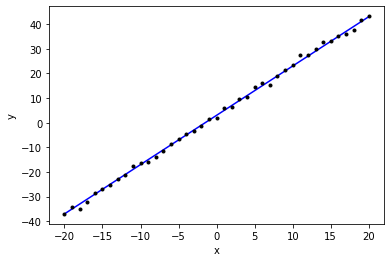

x [-20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.
   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]
y [-36.94684838 -34.39270672 -35.18036506 -32.01281637 -28.64166667
 -26.86557819 -25.42681566 -22.77035002 -21.02744078 -17.59987025
 -16.20253642 -16.00407115 -13.85690907 -11.46680449  -8.64113343
  -6.75353397  -4.77573458  -3.450125    -1.53894189   1.4150981
   1.88613481   5.90956185   6.41635951   9.76189414  10.35727605
  14.3752539   16.14956885  15.36424693  19.12150655  21.4870508
  23.34401249  27.61831214  27.51810442  29.84631812  32.84118113
  33.23860927  35.0098991   36.07960608  37.6986096   41.65134686
  43.184844  ]
m, b 4.0988062809861513e+65 -1.68899171886868e+66


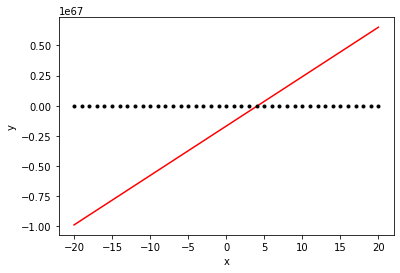

In [69]:
def main():

  x, y = input()
  print("x", x)
  print("y", y)

  m = 100.0
  b = 50.0   ##initialization

  for iter in range(0, 500):
    value_Object = ObjectiveFunction(m, b)
    b, m = gradientDescent(m, b)
    #print("cost", value_Object)
    #print("절편b",b)
    #print("기울기m",m)
  
  print("m, b",m,b)

  fig = plt.figure()

  graph3 = plt.plot(x, m * x + b, 'r')
  plt.xlabel('x')
  plt.ylabel('linear regression')

  graph4 = plt.plot(x, y, '.k')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
    
    #if value_Object == float('inf'):
    #  value_Object = 99999

if __name__ == "__main__":
  main()